In [1]:
import pandas as pd
import numpy as np
import requests, csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Block group level

In [3]:
#first grab 2021 census data at block group level for CV counties
#set variables
year = 2021
dsource = 'acs'
dname = 'acs5'
#cols = 'NAME,B15003_001E'
cols = 'B01003_001E,B06012_001E,B06012_002E,B19013_001E,B25064_001E,B23025_001E,B23025_002E,B23025_005E,B23025_007E,B23018_001E,B19301_001E,B15003_001E,B15003_017E,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B17011_001E,B19051_001E,B19051_002E,B19051_003E,B19055_002E,B19055_003E,B19056_001E,B19056_002E,B19057_002E,B19058_002E,B19083_001E,B19113_001E,B01003_001E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B19123_002E,B19123_003E'
state = '06'
county = '099,077,047'
block_group = '*'
#list of geographies: https://api.census.gov/data/2022/acs/acs5/geography.html
dcode = '2,12'
keyfile = 'apikey.txt'
outfile = 'nosipopcv2021.txt'

base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'

with open(keyfile) as key:
    api_key = key.read().strip()

data_url = f'{base_url}?get={cols}&for=block%20group:{block_group}&in=state:{state}&in=county:{county}&in=tract:*&key={api_key}'
response = requests.get(data_url)
popdata = response.json()
#for record in popdata:
#    print(record)

with open(outfile, 'w', newline='') as writefile:
    writer = csv.writer(writefile, quoting = csv.QUOTE_ALL, delimiter = ',')
    writer.writerows(popdata)

#readin
tempdf=pd.read_csv('nosipopcv2021.txt', converters={'state': str,'county': str, 'tract': str, 'block_group': str})


In [4]:
#grab missing block_group columns at the tract level
year = 2021
dsource = 'acs'
dname = 'acs5'
#cols = 'NAME,B15003_001E''
cols = 'B06012_001E,B06012_002E,B23018_001E,B19083_001E'
county = '099,077,047'
tract = '*'
#list of geographies: https://api.census.gov/data/2022/acs/acs5/geography.html
dcode = '2,12'
keyfile = 'apikey.txt'
outfile = 'nosimissing-tract2021.txt'

base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'
data_url = f'{base_url}?get={cols}&for=tract:{tract}&in=state:{state}&in=county:{county}&in=tract:*&key={api_key}'
response = requests.get(data_url)
popdata = response.json()
#for record in popdata:
#    print(record)

with open(outfile, 'w', newline='') as writefile:
    writer = csv.writer(writefile, quoting = csv.QUOTE_ALL, delimiter = ',')
    writer.writerows(popdata)

    
#read in missing columns    
missing=pd.read_csv('nosimissing-tract2021.txt', converters={'state': str,'county': str, 'tract': str})



In [5]:
missing.columns

Index(['B06012_001E', 'B06012_002E', 'B23018_001E', 'B19083_001E', 'state',
       'county', 'tract'],
      dtype='object')

In [6]:
#combine 2021 datasets
#make unique geoid for each line in both datasets
tempdf['temp'] = tempdf['state'].astype(str) + tempdf['county'].astype(str) + tempdf['tract'].astype(str)

missing['temp'] = missing['state'].astype(str) + missing['county'].astype(str) + missing['tract'].astype(str)
missing.drop(['state', 'county', 'tract'], axis = 1, inplace = True)

#replace NAs with tract level data
df21 = tempdf.merge(missing, how = 'left', on = 'temp')
df21.drop(['temp', 'B06012_001E_x', 'B06012_002E_x', 'B23018_001E_x', 'B19083_001E_x'], axis = 1, inplace = True)

#rename columns
colnames = ['Population','Median_household_income','Median_gross_rent','Total__Population_16_and_over','Total_In_labor_force','Total_In_labor_force_Civilian_labor_force_Unemployed','Total_Not_in_labor_force','Per_capita_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)','Total__Population_25_and_over','Total_Regular_high_school_diploma','Total_GED_or_alternative_credential','Total_Some_college_less_than_1_year','Total_Some_college_1_or_more_years_no_degree','Associates','Bachelors','Masters','Professional','Doctorate','Aggregate_income_deficit_in_the_past_12_months','Total__Households','Total_With_earnings','Total_No_earnings','Total_With_Social_Security_income','Total_No_Social_Security_income','Total__Households','Total_With_Supplemental_Security_Income_(SSI)','Total_With_public_assistance_income','Total_With_cash_public_assistance_or_Food_Stamps/SNAP','Median_family_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)','Total_Population','Total__Race','Total_White_alone','Total_Black_or_African_American_alone','Total_American_Indian_and_Alaska_Native_alone','Total_Asian_alone','Total_Native_Hawaiian_and_Other_Pacific_Islander_alone','Total_Some_other_race_alone','Total_Two_or_more_races','Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months','Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months','state', 'county','tract', 'blockgroup','TotalPopforPoverty', 'PopinPoverty','Working_hours','Gini_index']
df21.columns = colnames

In [7]:
#some tracts are missing from 2021 data, try 2022 dataset
year = 2022
dsource = 'acs'
dname = 'acs5'
#cols = 'NAME,B15003_001E'
cols = 'B01003_001E,B06012_001E,B06012_002E,B19013_001E,B25064_001E,B23025_001E,B23025_002E,B23025_005E,B23025_007E,B23018_001E,B19301_001E,B15003_001E,B15003_017E,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B17011_001E,B19051_001E,B19051_002E,B19051_003E,B19055_002E,B19055_003E,B19056_001E,B19056_002E,B19057_002E,B19058_002E,B19083_001E,B19113_001E,B01003_001E,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B19123_002E,B19123_003E'
state = '06'
county = '099,077,047'
tract = '*'
block_group = '*'
#list of geographies: https://api.census.gov/data/2022/acs/acs5/geography.html
dcode = '2,12'
keyfile = 'apikey.txt'
outfile = 'nosipopcv2022.txt'

base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'

with open(keyfile) as key:
    api_key = key.read().strip()

data_url = f'{base_url}?get={cols}&for=block%20group:{block_group}&in=state:{state}&in=county:{county}&in=tract:{tract}&key={api_key}'
response = requests.get(data_url)
popdata = response.json()
#for record in popdata:
#    print(record)

with open(outfile, 'w', newline='') as writefile:
    writer = csv.writer(writefile, quoting = csv.QUOTE_ALL, delimiter = ',')
    writer.writerows(popdata)
#readin
tempdf=pd.read_csv('nosipopcv2022.txt', converters={'state': str,'county': str, 'tract': str, 'block_group': str})

In [13]:
#grab unavailable columns for census tract level
year = 2022
dsource = 'acs'
dname = 'acs5'
#cols = 'NAME,B15003_001E''
cols = 'B06012_001E,B06012_002E,B23018_001E,B19083_001E'
county = '099,077,047'
tract = '*'
#list of geographies: https://api.census.gov/data/2022/acs/acs5/geography.html
dcode = '2,12'
keyfile = 'apikey.txt'
outfile = 'nosimissing-tract2022.txt'

base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'
data_url = f'{base_url}?get={cols}&for=tract:{tract}&in=state:{state}&in=county:{county}&in=tract:*&key={api_key}'
response = requests.get(data_url)
popdata = response.json()
#for record in popdata:
#    print(record)

with open(outfile, 'w', newline='') as writefile:
    writer = csv.writer(writefile, quoting = csv.QUOTE_ALL, delimiter = ',')
    writer.writerows(popdata)
#read in missing columns    
missing=pd.read_csv('nosimissing-tract2022.txt', converters={'state': str,'county': str, 'tract': str})

In [14]:
#combine 2022 datasets
#make unique geoid for each line in both datasets
tempdf['temp'] = tempdf['state'].astype(str) + tempdf['county'].astype(str) + tempdf['tract'].astype(str)

missing['temp'] = missing['state'].astype(str) + missing['county'].astype(str) + missing['tract'].astype(str)
missing.drop(['state', 'county', 'tract'], axis = 1, inplace = True)

#replace NAs with tract level data
df22 = tempdf.merge(missing, how = 'left', on = 'temp')
df22.drop(['temp', 'B06012_001E_x', 'B06012_002E_x', 'B23018_001E_x', 'B19083_001E_x'], axis = 1, inplace = True)

#rename columns
colnames = ['Population','Median_household_income','Median_gross_rent','Total__Population_16_and_over','Total_In_labor_force','Total_In_labor_force_Civilian_labor_force_Unemployed','Total_Not_in_labor_force','Per_capita_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)','Total__Population_25_and_over','Total_Regular_high_school_diploma','Total_GED_or_alternative_credential','Total_Some_college_less_than_1_year','Total_Some_college_1_or_more_years_no_degree','Associates','Bachelors','Masters','Professional','Doctorate','Aggregate_income_deficit_in_the_past_12_months','Total__Households','Total_With_earnings','Total_No_earnings','Total_With_Social_Security_income','Total_No_Social_Security_income','Total__Households','Total_With_Supplemental_Security_Income_(SSI)','Total_With_public_assistance_income','Total_With_cash_public_assistance_or_Food_Stamps/SNAP','Median_family_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)','Total_Population','Total__Race','Total_White_alone','Total_Black_or_African_American_alone','Total_American_Indian_and_Alaska_Native_alone','Total_Asian_alone','Total_Native_Hawaiian_and_Other_Pacific_Islander_alone','Total_Some_other_race_alone','Total_Two_or_more_races','Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months','Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months','state', 'county','tract', 'blockgroup','TotalPopforPoverty', 'PopinPoverty','Working_hours','Gini_index']
df22.columns = colnames

In [15]:
df22['GEOID']= df22['state'].astype(str) + df22['county'].astype(str) + df22['tract'].astype(str) + df22['blockgroup'].astype(str)
df21['GEOID']= df21['state'].astype(str) + df21['county'].astype(str) + df21['tract'].astype(str) + df21['blockgroup'].astype(str)


In [16]:
df = pd.concat([df21, df22])
df = df.drop_duplicates(subset = ['GEOID'])

In [20]:
#make a couple new columns: percent with a degree, place code (equivalent to FIPS), percent households below poverty
df['percent_degree']= (df['Bachelors']+df['Masters']+df['Professional']+df['Doctorate'])/df['Total__Population_25_and_over']

df["Poverty"] = df['PopinPoverty']/df['TotalPopforPoverty']
df['Unemployed'] = df['Total_In_labor_force_Civilian_labor_force_Unemployed']/df['Total_In_labor_force']
df['Food_assistance'] = df['Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months']/(df['Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months'] + df['Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months'])


#drop redundant columns 
df.drop(['Bachelors', 'Masters', 'Professional', 'Doctorate', 'PopinPoverty', 'TotalPopforPoverty', 'Total_In_labor_force', 'Total_In_labor_force_Civilian_labor_force_Unemployed', 'Total__Population_16_and_over', 'Total_Not_in_labor_force', 'Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months', 'Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months'], axis = 1, inplace = True)

df.GEOID = df.GEOID.str.zfill(12)

df.replace(-666666666, np.nan, inplace=True)
df.replace(-999999999, np.nan, inplace=True)
df.replace(-888888888, np.nan, inplace=True)
df.to_csv('nosi2021census.csv')




## Tract level

In [2]:
#tract level 2017
year = 2017
dsource = 'acs'
dname = 'acs5'
cols = 'B01003_001E,B19013_001E,B25031_001E,B27011_001E,B27011_002E,B28007_015E,B28007_009E,B19301_001E,B15003_001E,B15003_017E,B15003_018E,B15003_019E,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,B17008_001E,B19051_001E,B19051_002E,B19051_003E,B19055_002E,B19055_003E,B19056_001E,B19056_002E,B19057_002E,B19058_002E,B19113_001E,B02001_001E,B00001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B07012_001E,B07012_002E,B23018_001E,B19083_001E,B19058_003E'
county = '*'
state = '06'
tract = '*'
#list of geographies: https://api.census.gov/data/2022/acs/acs5/geography.html
#2015 acs1 subject tables variables
#https://api.census.gov/data/2015/acs/acs1/subject/variables
dcode = '2,12'
keyfile = 'apikey.txt'
outfile = 'nosi-tract2017.txt'


base_url = f'https://api.census.gov/data/{year}/{dsource}/{dname}'

with open(keyfile) as key:
    api_key = key.read().strip()
    
data_url = f'{base_url}?get={cols}&for=tract:{tract}&in=state:{state}&in=county:{county}&in=tract:*&key={api_key}'
response = requests.get(data_url)
popdata = response.json()

with open(outfile, 'w', newline='') as writefile:
    writer = csv.writer(writefile, quoting = csv.QUOTE_ALL, delimiter = ',')
    writer.writerows(popdata)

    
#readin   
tract17=pd.read_csv('nosi-tract2017.txt', converters={'state': str,'county': str, 'tract': str})


In [3]:
tract17.columns

Index(['B01003_001E', 'B19013_001E', 'B25031_001E', 'B27011_001E',
       'B27011_002E', 'B28007_015E', 'B28007_009E', 'B19301_001E',
       'B15003_001E', 'B15003_017E', 'B15003_018E', 'B15003_019E',
       'B15003_020E', 'B15003_021E', 'B15003_022E', 'B15003_023E',
       'B15003_024E', 'B15003_025E', 'B17008_001E', 'B19051_001E',
       'B19051_002E', 'B19051_003E', 'B19055_002E', 'B19055_003E',
       'B19056_001E', 'B19056_002E', 'B19057_002E', 'B19058_002E',
       'B19113_001E', 'B02001_001E', 'B00001_001E', 'B02001_002E',
       'B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E',
       'B02001_007E', 'B02001_008E', 'B07012_001E', 'B07012_002E',
       'B23018_001E', 'B19083_001E', 'B19058_003E', 'state', 'county',
       'tract'],
      dtype='object')

In [4]:
#rename columns
colnames = ['Population','Median_household_income','Median_gross_rent','Total__Population_16_and_over','Total_In_labor_force','Total_Not_in_labor_force','Total_In_labor_force_Civilian_labor_force_Unemployed','Per_capita_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)','Total__Population_25_and_over','Total_Regular_high_school_diploma','Total_GED_or_alternative_credential','Total_Some_college_less_than_1_year','Total_Some_college_1_or_more_years_no_degree','Associates','Bachelors','Masters','Professional','Doctorate','Aggregate_income_deficit_in_the_past_12_months','Total__Households','Total_With_earnings','Total_No_earnings','Total_With_Social_Security_income','Total_No_Social_Security_income','Total__Households','Total_With_Supplemental_Security_Income_(SSI)','Total_With_public_assistance_income','Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months','Median_family_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)','Total__Race','Total_Population','Total_White_alone','Total_Black_or_African_American_alone','Total_American_Indian_and_Alaska_Native_alone','Total_Asian_alone','Total_Native_Hawaiian_and_Other_Pacific_Islander_alone','Total_Some_other_race_alone','Total_Two_or_more_races','TotalPopforPoverty','PopinPoverty','Working_hours','Gini_index','Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months','state','county','tract']
tract17.columns = colnames
tract17['GEOID']= tract17['state'].astype(str) + tract17['county'].astype(str) + tract17['tract'].astype(str)


#make a couple new columns: percent with a degree, place code (equivalent to FIPS), percent households below poverty
tract17['percent_degree']= (tract17['Bachelors']+tract17['Masters']+tract17['Professional']+tract17['Doctorate'])/tract17['Total__Population_25_and_over']

tract17["Poverty"] = tract17['PopinPoverty']/tract17['TotalPopforPoverty']
tract17['Unemployed'] = tract17['Total_In_labor_force_Civilian_labor_force_Unemployed']/tract17['Total_In_labor_force']




In [5]:
tract17['assistance'] = tract17['Total_With_public_assistance_income']/(tract17['Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months'] + tract17['Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months'])


#drop redundant columns 
tract17.drop(['Bachelors', 'Masters', 'Professional', 'Doctorate', 'PopinPoverty', 'TotalPopforPoverty', 'Total_In_labor_force', 'Total_In_labor_force_Civilian_labor_force_Unemployed', 'Total__Population_16_and_over', 'Total_Not_in_labor_force', 'Total_No_cash_public_assistance_income_or_household_Food_Stamps/SNAP_benefits_in_the_past_12_months', 'Total_With_cash_public_assistance_income_or_households_receiving_Food_Stamps/SNAP_benefits_in_the_past_12_months'], axis = 1, inplace = True)

tract17.GEOID = tract17.GEOID.str.zfill(11)

tract17.replace(-666666666, np.nan, inplace=True)
tract17.replace(-999999999, np.nan, inplace=True)
tract17.replace(-888888888, np.nan, inplace=True)
tract17.to_csv('nosi2017census.csv')

In [6]:
tract17.columns

Index(['Population', 'Median_household_income', 'Median_gross_rent',
       'Per_capita_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)',
       'Total__Population_25_and_over', 'Total_Regular_high_school_diploma',
       'Total_GED_or_alternative_credential',
       'Total_Some_college_less_than_1_year',
       'Total_Some_college_1_or_more_years_no_degree', 'Associates',
       'Aggregate_income_deficit_in_the_past_12_months', 'Total__Households',
       'Total_With_earnings', 'Total_No_earnings',
       'Total_With_Social_Security_income', 'Total_No_Social_Security_income',
       'Total__Households', 'Total_With_Supplemental_Security_Income_(SSI)',
       'Total_With_public_assistance_income',
       'Median_family_income_in_the_past_12_months_(in_2021_inflation-adjusted_dollars)',
       'Total__Race', 'Total_Population', 'Total_White_alone',
       'Total_Black_or_African_American_alone',
       'Total_American_Indian_and_Alaska_Native_alone', 'Total_Asian_alone

In [15]:
print('the following students were missing median household income data')
missing = dataset[dataset['Median household income'].isna()].copy()
missing = missing[['PACIFIC_ID','state','county','tract']]
missing

the following students were missing median household income data


,PACIFIC_ID,state,county,tract
0,989344963,6,077,3504
10,989347596,6,037,670002
51,989334791,6,077,4004
62,989338136,6,013,355115
79,989304755,6,037,403316
141,989284218,6,037,300100
196,989300157,6,077,3404
201,989308575,6,077,3808
204,989300770,6,077,3601
213,989306465,6,077,5137


In [16]:
#lookup median household income for census tracts above
missing['Median household income'] = [116656,74972,108278,156916,92488,158713,53567,80033,66844,110518,103792,117500]
missing.drop(['state', 'county', 'tract'], axis = 1, inplace = True)
#fill in missing incomes
dataset.fillna(missing, inplace = True)

In [17]:
dataset.columns

Index(['PACIFIC_ID', 'FAKE ID', 'LAST_NAME', 'FIRST_NAME', 'Full name', 'ID',
       'ETHN_CODE', 'enrolled', 'last graded term', 'terms', 'HS_GPA', 'cGPA',
       'BioBridge', 'BioPLUS', 'Cohort', 'OTHERCOHORT', 'low hs_GPA',
       'anyother', 'total credits', 'Zip', 'first gen', 'changed_major_to',
       'changed major', 'ADI', 'place_code', 'Name', 'Population',
       'Households', 'PopEduc', 'Bachelors', 'Masters', 'Professional',
       'Doctorate', 'HouseholdsP', 'Households below poverty',
       'Households above poverty', 'Median income', 'Median household income',
       'state', 'county', 'tract', 'blockgroup', 'percent_degree',
       'Households_below_poverty_percent', 'persistance', 'BB'],
      dtype='object')

In [18]:
dataset.to_csv('censusdataset.csv')

In [23]:
#what characteristics normally predict persistance
#assume no response for first gen = not first gen
import shap
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing 
gen = dataset[dataset.BB == 'Control'][['first gen', 'HS_GPA', 'anyother', 'ADI', 'Median household income', 'percent_degree', 'Households_below_poverty_percent', 'persistance']].copy()
gen.replace({'first gen' : { 'Yes' : 1, 'No' : 0, 'No Response' : np.nan }}, inplace = True)

y = gen['persistance']
gen = gen.drop(['persistance'], axis = 1)
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(gen)
X = pd.DataFrame(d, columns=gen.columns)

X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=101) 

In [29]:

# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# Create an XGBoost classifier
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 1.221 (0.174)


In [33]:
print(((1-cv_results["test-error-mean"]).iloc[-1]))      

NameError: name 'cv_results' is not defined

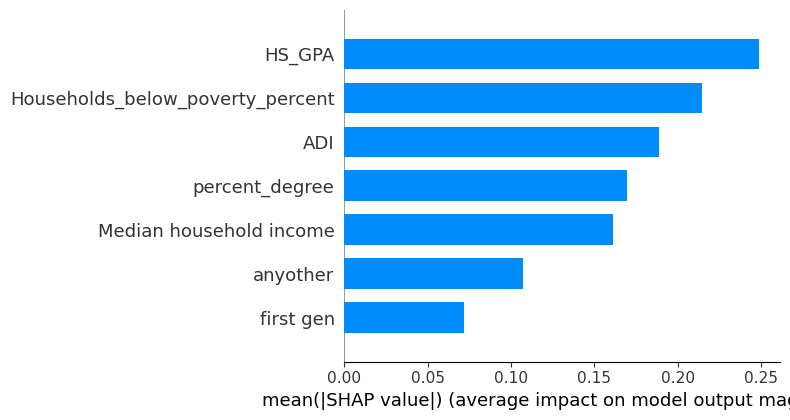

In [30]:
#calculate feature importance using SHAP
shap.initjs()
shte = shap.TreeExplainer(xgb)
shap_vals = shte.shap_values(X_test)
shap.summary_plot(shap_vals, X_test, plot_type = 'bar', max_display = X.shape[1])

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


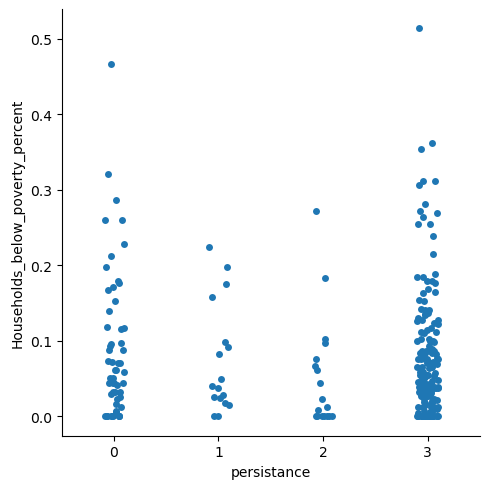

In [40]:
sns.catplot(data=dataset, y="Households_below_poverty_percent", x="persistance")

In [45]:
from scipy.stats import ttest_ind

cat1 = dataset[dataset['BB']=='Participant']
cat2 = dataset[dataset['BB']=='Control']

ttest_ind(cat1['Median household income'], cat2['Median household income'])

TtestResult(statistic=-3.6763601425937233, pvalue=0.00028888945103460514, df=253.0)

In [46]:
ttest_ind(cat1['ADI'], cat2['ADI'])

TtestResult(statistic=4.608966740884228, pvalue=6.423230860053781e-06, df=253.0)

In [330]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay

#Random Forest with final parameters based on grid search and graphs
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# accuracy score
print('accuracy', accuracy_score(y_test, pred))
# F1 score
print('F1',f1_score(y_test,pred))
disp.plot()
plt.show()

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [310]:
len(dataset)

255

<Axes: xlabel='BB', ylabel='Median household income'>

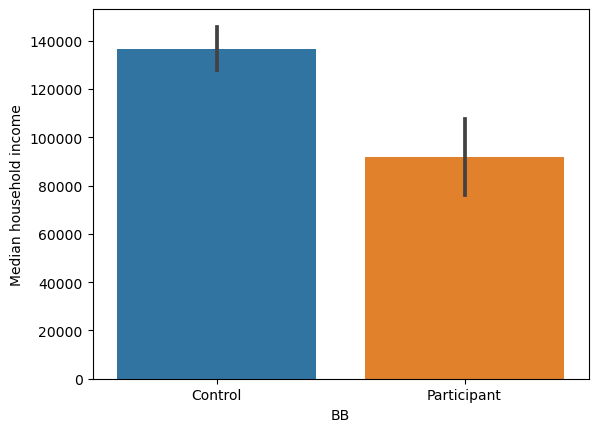

In [39]:
sns.barplot(data=dataset, y="Median household income", x="BB")

<Axes: xlabel='BB', ylabel='cGPA'>

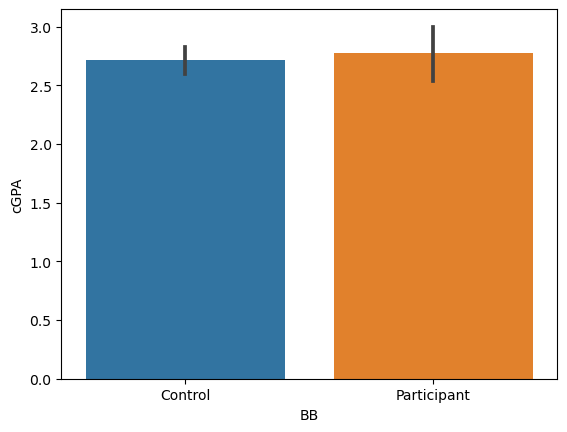

In [25]:
sns.barplot(data=dataset, y="cGPA", x="BB")

<Axes: xlabel='BB', ylabel='terms'>

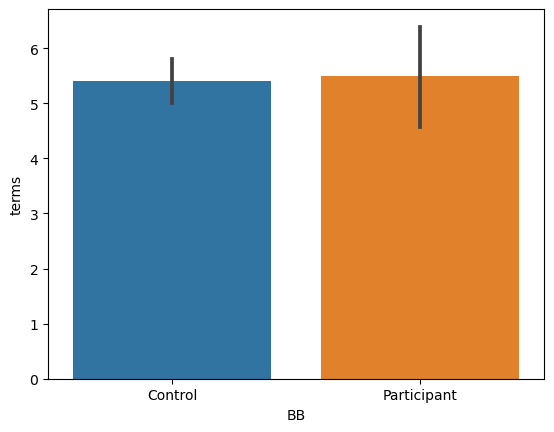

In [178]:
sns.barplot(data=dataset, y="terms", x="BB")

<Axes: xlabel='BB', ylabel='total credits'>

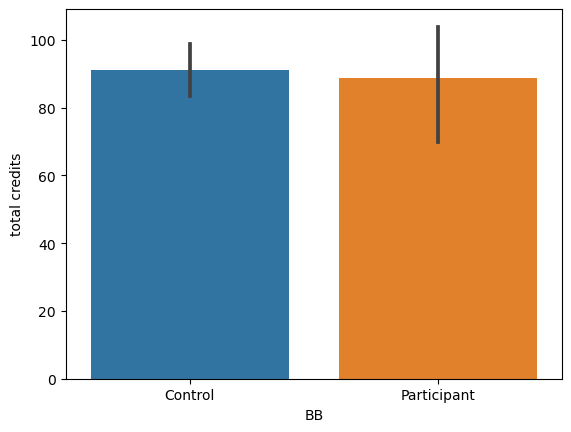

In [190]:
sns.barplot(data=dataset, y="total credits", x="BB")

<Axes: xlabel='BB', ylabel='ADI'>

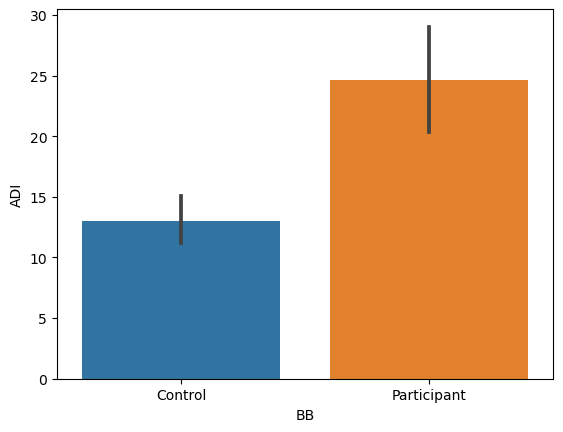

In [26]:
sns.barplot(data=dataset, y="ADI", x="BB")

In [42]:
dataset[dataset.BB == 'Participant'].describe()

,PACIFIC_ID,FAKE ID,ID,enrolled,terms,HS_GPA,cGPA,OTHERCOHORT,low hs_GPA,anyother,...,Households above poverty,Median income,Median household income,state,county,tract,blockgrou,percent_degree,Households_below_poverty_percent,persistance
count,4.100000e+01,4.100000e+01,4.100000e+01,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,0.0,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,9.893034e+08,1.137130e+09,9.893034e+08,201876.121951,5.487805,3.659756,2.778293,0.073171,0.146341,0.097561,...,522.000000,NaN,91768.951220,6.0,76.073171,12701.317073,2.048780,0.186321,0.095798,2.195122
std,2.915830e+04,3.351523e+04,2.915830e+04,86.461609,2.950610,0.216824,0.780307,0.263652,0.357839,0.300406,...,287.231179,NaN,52759.413155,0.0,12.158105,54854.853098,1.047645,0.131889,0.105430,1.308043
min,9.892619e+08,1.137083e+09,9.892619e+08,201781.000000,0.000000,3.030000,0.000000,0.000000,0.000000,0.000000,...,142.000000,NaN,0.000000,6.0,13.000000,101.000000,1.000000,0.006018,0.000000,0.000000
25%,9.892737e+08,1.137096e+09,9.892737e+08,201781.000000,3.000000,3.510000,2.300000,0.000000,0.000000,0.000000,...,319.000000,NaN,59529.000000,6.0,77.000000,3307.000000,1.000000,0.076473,0.032211,1.000000
50%,9.893025e+08,1.137129e+09,9.893025e+08,201881.000000,7.000000,3.640000,2.900000,0.000000,0.000000,0.000000,...,490.000000,NaN,93257.000000,6.0,77.000000,3504.000000,2.000000,0.157672,0.061281,3.000000
75%,9.893340e+08,1.137166e+09,9.893340e+08,201981.000000,7.000000,3.840000,3.250000,0.000000,0.000000,0.000000,...,616.000000,NaN,133631.000000,6.0,77.000000,5122.000000,3.000000,0.268489,0.136012,3.000000
max,9.893483e+08,1.137182e+09,9.893483e+08,201981.000000,10.000000,4.000000,3.860000,1.000000,1.000000,1.000000,...,1539.000000,NaN,183750.000000,6.0,99.000000,355115.000000,5.000000,0.513761,0.513966,3.000000


In [43]:
dataset[dataset.BioBridge == 'Invited'].describe()

,PACIFIC_ID,FAKE ID,ID,enrolled,terms,HS_GPA,cGPA,OTHERCOHORT,low hs_GPA,anyother,...,Households above poverty,Median income,Median household income,state,county,tract,blockgrou,percent_degree,Households_below_poverty_percent,persistance
count,2.900000e+01,2.900000e+01,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,...,28.000000,0.0,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000,29.000000
mean,9.893155e+08,1.137144e+09,9.893155e+08,201912.034483,5.551724,3.547241,2.494138,0.137931,0.379310,0.344828,...,541.321429,NaN,106552.500000,6.0,70.357143,53293.785714,2.142857,0.183732,0.115566,2.241379
std,2.360388e+04,2.713084e+04,2.360388e+04,76.080072,2.835819,0.262555,0.947883,0.350931,0.493804,0.552647,...,217.113736,NaN,50203.325764,0.0,25.797235,123354.882866,1.078898,0.120777,0.119283,1.243703
min,9.892703e+08,1.137092e+09,9.892703e+08,201781.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,223.000000,NaN,42500.000000,6.0,13.000000,501.000000,1.000000,0.002717,0.000000,0.000000
25%,9.893027e+08,1.137129e+09,9.893027e+08,201881.000000,5.000000,3.330000,2.230000,0.000000,0.000000,0.000000,...,367.000000,NaN,74058.000000,6.0,67.000000,3089.500000,1.000000,0.084494,0.027724,2.000000
50%,9.893123e+08,1.137141e+09,9.893123e+08,201881.000000,7.000000,3.550000,2.620000,0.000000,0.000000,0.000000,...,502.000000,NaN,98026.500000,6.0,77.000000,3860.000000,2.000000,0.180883,0.067597,3.000000
75%,9.893381e+08,1.137170e+09,9.893381e+08,201981.000000,7.000000,3.740000,3.110000,0.000000,1.000000,1.000000,...,684.000000,NaN,122271.500000,6.0,77.000000,5619.000000,3.000000,0.273937,0.182084,3.000000
max,9.893460e+08,1.137179e+09,9.893460e+08,201981.000000,8.000000,3.940000,3.680000,1.000000,1.000000,2.000000,...,960.000000,NaN,250001.000000,6.0,99.000000,355123.000000,5.000000,0.430556,0.362595,3.000000


In [187]:
print(len(dataset[(dataset.terms >0) & (dataset.BB =='Participant')])/len(dataset[dataset.BB=='Participant']))
print(len(dataset[(dataset.terms >0) & (dataset.BB =='Control')])/len(dataset[dataset.BB=='Control']))


0.926829268292683
0.8807339449541285


In [188]:
print(len(dataset[(dataset.terms >2) & (dataset.BB =='Participant')])/len(dataset[dataset.BB=='Participant']))
print(len(dataset[(dataset.terms >2) & (dataset.BB =='Control')])/len(dataset[dataset.BB=='Control']))


0.7560975609756098
0.7477064220183486


In [189]:
print(len(dataset[(dataset.terms >4) & (dataset.BB =='Participant')])/len(dataset[dataset.BB=='Participant']))
print(len(dataset[(dataset.terms >4) & (dataset.BB =='Control')])/len(dataset[dataset.BB=='Control']))

0.7317073170731707
0.7018348623853211
